In [5]:
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde 
from analytical import sound_hard_circle, sound_hard_circle_deepxde


#dde.config.set_default_float('float64')
dde.config.set_default_float('float32')

'''                        Problem parameters                               '''
k0 = 1                 # wavenumber
wave_len = 2*np.pi / k0  # wavelength
radius = 1 * wave_len    # scatterer radius
d_air = 4 * wave_len     # distance between scatterer and absorbing layer

'''    Discretization parameters: polynomial degree and mesh resolution     '''
n_wave = 10  # number of mesh elements per wavelength

dim_x = 2 * (radius + d_air)

# The mesh element size is h_elem
h_elem = wave_len / n_wave

R = dim_x / 2.
nx = int(dim_x / h_elem)

Using backend: tensorflow.compat.v1

2022-04-28 19:51:49.414221: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
non-resource variables are not supported in the long term

Set the default float type to float32


/usr/local/lib/python3.7/dist-packages/skopt/sampler/sobol.py:250: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+10002=10002. 
  total_n_samples))
/usr/local/lib/python3.7/dist-packages/skopt/sampler/sobol.py:250: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+402=402. 
  total_n_samples))


Compiling model...
Building feed-forward neural network...
'build' took 0.046321 s



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2022-04-28 19:52:01.209194: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-04-28 19:52:01.292745: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.46GiB deviceMemoryBandwidth: 625.94GiB/s
2022-04-28 19:52:01.295247: I 

'compile' took 4.839722 s

Initializing variables...
Training model...



2022-04-28 19:52:06.050231: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3000030000 Hz
2022-04-28 19:52:06.202793: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


Step      Train loss                                                      Test loss                                                       Test metric   
0         [4.06e-01, 1.56e-01, 7.83e-02, 5.63e-02, 1.59e+01, 4.22e+01]    [4.09e-01, 1.56e-01, 7.83e-02, 5.63e-02, 1.59e+01, 4.22e+01]    [2.02e+00]    


2022-04-28 19:52:06.598813: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


1000      [1.84e-04, 1.38e-04, 3.65e-04, 2.96e-04, 2.12e-04, 3.69e-04]    [1.79e-04, 1.34e-04, 3.65e-04, 2.96e-04, 2.12e-04, 3.69e-04]    [1.00e+00]    
2000      [9.87e-05, 3.45e-05, 5.52e-05, 5.90e-05, 1.20e-04, 1.06e-04]    [9.36e-05, 3.42e-05, 5.52e-05, 5.90e-05, 1.20e-04, 1.06e-04]    [1.00e+00]    
3000      [4.78e-05, 1.41e-05, 1.45e-05, 2.03e-05, 3.78e-05, 4.21e-05]    [4.52e-05, 1.45e-05, 1.45e-05, 2.03e-05, 3.78e-05, 4.21e-05]    [1.00e+00]    
4000      [2.44e-05, 8.14e-06, 6.14e-06, 9.16e-06, 2.32e-05, 2.36e-05]    [2.32e-05, 8.41e-06, 6.14e-06, 9.16e-06, 2.32e-05, 2.36e-05]    [1.00e+00]    
5000      [1.59e-05, 7.34e-06, 4.61e-06, 7.09e-06, 3.44e-05, 2.26e-05]    [1.52e-05, 7.52e-06, 4.61e-06, 7.09e-06, 3.44e-05, 2.26e-05]    [1.00e+00]    
6000      [3.78e-05, 9.19e-05, 6.00e-06, 7.96e-06, 8.45e-03, 2.58e-03]    [3.81e-05, 9.26e-05, 6.00e-06, 7.96e-06, 8.45e-03, 2.58e-03]    [1.00e+00]    
7000      [7.94e-06, 4.87e-06, 2.19e-06, 3.57e-06, 7.66e-06, 1.32e-05]    [7.74e-0

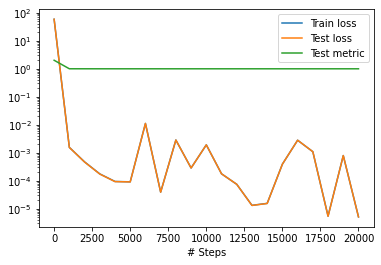

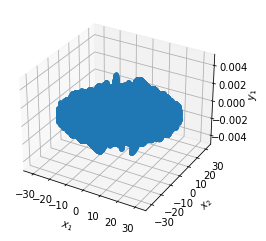

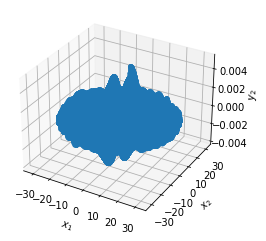

In [6]:
obstacle = dde.geometry.Disk([0,0], radius)
disk = dde.geometry.Disk([0,0], R)

geom = dde.geometry.CSGDifference(disk, obstacle)

def pde(x, y):
    y0, y1 = y[:, 0:1], y[:, 1:2]
    
    y0_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    y0_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)

    y1_xx = dde.grad.hessian(y, x,component=1, i=0, j=0)
    y1_yy = dde.grad.hessian(y, x,component=1, i=1, j=1)

    return [-y0_xx - y0_yy - k0 ** 2 * y0,
            -y1_xx - y1_yy - k0 ** 2 * y1]


def boundary_obstacle(_, on_boundary):
    return on_boundary and obstacle.on_boundary(_)

def boundary_disk(_, on_boundary):
    return on_boundary and disk.on_boundary(_)

def func0(x):
    normal = disk.boundary_normal(x)
    w = 1j * k0 * np.exp(1j * k0 * x[:, 0:1])
    result = w * normal[:, 0:1]
    return np.real(result)

def solution(x):
    from scipy.special import jv, hankel1
    result = sound_hard_circle_deepxde(k0, radius, x).reshape((x.shape[0],1))
    real = np.real(result)
    imag = np.imag(result)
    return np.hstack((real, imag))

def func1(x):
    normal = disk.boundary_normal(x)
    w = 1j * k0 * np.exp(1j * k0 * x[:, 0:1])
    result = w * normal[:, 0:1]
    return np.imag(result)

bc_obstacle0 = dde.NeumannBC(geom, func0, boundary_obstacle, component = 0)
bc_obstacle1 = dde.NeumannBC(geom, func1, boundary_obstacle, component = 1)

bc_disk0 = dde.RobinBC(geom, lambda X, y: -k0 * y[:, 1:2], boundary_disk, component = 0)
bc_disk1 = dde.RobinBC(geom, lambda X, y: k0 * y[:, 0:1], boundary_disk, component = 1)



bcs = [bc_obstacle0, bc_obstacle1, bc_disk0, bc_disk1]
weights = [1, 1, 100, 100, 100, 100]
data = dde.data.PDE(geom, pde, bcs, num_domain= nx**2, num_boundary= 4 * nx, num_test= 10 * nx ** 2, solution = solution)
net = dde.maps.FNN([2] + [50] * 4 + [2], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001, loss_weights= weights, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=20000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

#model.compile("L-BFGS")
#model.train()
#dde.saveplot(losshistory, train_state, issave=True, isplot=True)


In [9]:

'''            Evaluate field over a specified grid of points              '''
# Square grid with 10 points per wavelength in each direction
Nx = int(np.ceil(dim_x/wave_len * 10))
Ny = Nx

# Grid does not include absorbing layers
dim_in = dim_x# / 2.


Relative error =  0.9999975821021699


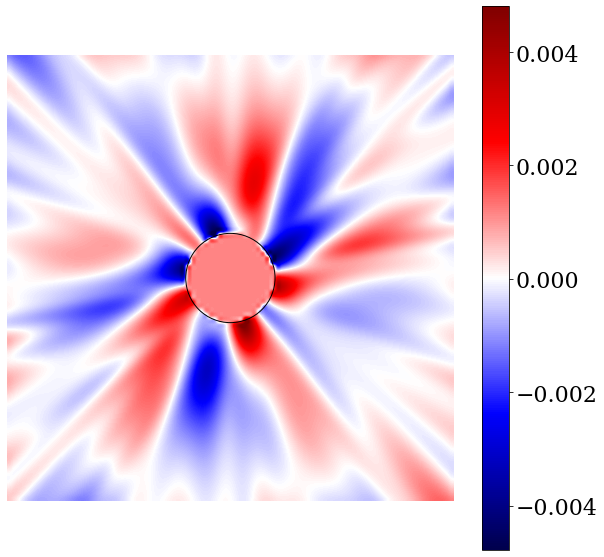

In [10]:

# Grid points
xmin, xmax, ymin, ymax = [-dim_in/2, dim_in/2, -dim_in/2, dim_in/2]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))

points_2d = points[:2, :]

in_circ = points[0, :]**2 + points[1, :]**2 <= (radius)**2
in_circ_2d = points_2d[0, :]**2 + points_2d[1, :]**2 <= (radius)**2
points[0, in_circ] = -radius - wave_len / 10
points[1, in_circ] = radius + wave_len / 10
points[2, in_circ] = 0.

# Bounding box tree etc for function evaluations

u_sca = model.predict(points[:2, :].T)
u_sca = u_sca[:, 0] + 1j* u_sca[:, 1]
u_sca = u_sca.reshape((Nx, Ny))

'''                  Compare against analytical solution                    '''
# Uncomment to perform comparison, takes a few seconds to run
u_exact = sound_hard_circle(k0, radius, plot_grid)
diff = u_exact-u_sca
error = np.linalg.norm(diff)/np.linalg.norm(u_exact)
print('Relative error = ', error)

'''                     Plot field and save figure                          '''
plt.rc('font', family='serif', size=22)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
plt.imshow(np.fliplr(np.real(u_sca)).T,
           extent=[-dim_in/2, dim_in/2, -dim_in/2, dim_in/2],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16')
circle = plt.Circle((0., 0.), radius, color='black', fill=False)
ax.add_artist(circle)
plt.axis('off')
plt.colorbar()
#fig.savefig('circle_scatter.png')